#  Rosemann Store Sales Analysis from August to January 2015

## Import necessary modules for exploration

In [7]:
import pandas as pd
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.impute import KNNImputer

## Load the dataset(s) and view the first rows


In [8]:
df_train = pd.read_csv('rossmann-store-sales/train.csv')
df_store = pd.read_csv('rossmann-store-sales/store.csv')
df_test = pd.read_csv('rossmann-store-sales/test.csv')
full_store_details = df_train.merge(df_store)


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In a data frame each row corresponds to one observation (e.g., a store) and
each column corresponds to one feature (type, promotions run, assortment.). 

For example, by looking at the first observation we can see that store id 1 is of type 'c' and carries a basic assortment of goods (denoted as a) and is 1270 metres from the next competitor that was opened around September in 2008. Additionally, this store does not participate in the ongoing promotion (labelled Promo 2).


## Get to know your data

In [23]:
df_train.info() , df_test.info() , df_store.info(), full_store_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date     

(None, None, None, None)

The *df_store* contains information pertaining to each store such as the id, the distance to the nearest competitor and how long the competitor has been open for , whether or not the store participates in the promotion labelled as *Promo2* and for how long and the intervals the promo 2 is run

The *df_train* dataset contains information on the stores sales and customers per day as well as whether or not a promotion is run.

The *df_test* dataset follows a similar model to the *df_train*


## Evaluate the correlation

Since the *df_train* dataset has no empty cells, we use this to start of our co-relation analysis

In [16]:
df_train.corr()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
Store,1.000000,-0.000008,0.005126,0.024325,-0.000047,0.000058,0.000641
DayOfWeek,-0.000008,1.000000,-0.462125,-0.386445,-0.528963,-0.392925,-0.205388
Sales,0.005126,-0.462125,1.000000,0.894711,0.678472,0.452345,0.085124
Customers,0.024325,-0.386445,0.894711,1.000000,0.616768,0.316169,0.071568
Open,-0.000047,-0.528963,0.678472,0.616768,1.000000,0.295042,0.086171
Promo,0.000058,-0.392925,0.452345,0.316169,0.295042,1.000000,0.067483
SchoolHoliday,0.000641,-0.205388,0.085124,0.071568,0.086171,0.067483,1.000000


From the above correlation table , it is clear that more sales occur when customers increase . Additionally, being open means more sales and participating in a promotion is warmly related to more sales

The test dataset is only missing one value in the open column which we can fill in with the mode. 

#### Correlation values of the variables in the train set
A correlation of 1 indicates a perfect positive correlation where an increase in x (independent variable) results in an increase in the dependent variables(s).

#### Influence of holidays such as Christmas and other public holidays on the sales

In [25]:
df_train.groupby('StateHoliday').sum()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
StateHoliday,,,,,,,
0,73238788,520943,751505326,84171309,112140,49623,30088
0,477431171,3440542,5113659442,558626686,731342,327661,136122
a,11344209,69373,5890305,887746,694,7451,5205
b,3733020,20070,1433744,244599,145,3345,6206
c,2292556,16220,691806,111415,71,0,4100


#### Sales distribution across months

In [ ]:
full_store_details['Date'] = pd.to_datetime(full_store_details['Date'])
full_store_details['Month']= full_store_details['Date'].dt.month
full_store_details['Day']= full_store_details['Date'].dt.dayofweek
month_trends = full_store_details.groupby('Month').sum()
month_trends

#### Influence of type of store of assortment on sales

In [40]:
full_store_details.groupby('Assortment').sum()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Month
Assortment,,,,,,,,,,,,,,
a,299121594,2148941,2945750070,332766938,444909,204970,96492,2.356623e+09,2866375.0,796872036.0,267232,6506250.0,537578880.0,3129382
b,5200774,33161,70946312,16972525,8212,3166,1503,9.876640e+06,20724.0,5660478.0,3584,71614.0,7213650.0,48797
c,263717376,1885046,2856484241,294302292,391271,179944,83726,3.142687e+09,2124566.0,591219296.0,238362,5270246.0,479547724.0,2769200


#### Influence of promotions on sales

In [41]:
full_store_details.groupby('Promo').sum()

,Store,DayOfWeek,Sales,Customers,Open,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Month
Promo,,,,,,,,,,,,,
0,351315132,2903268,2771974337,325777807,467496,99619,3.406815e+09,3099725.0,862031112.0,315162,7337046.0,634028144.0,3697674
1,216724612,1163880,3101206286,318263948,376896,82102,2.102371e+09,1911940.0,531720698.0,194016,4511064.0,390312110.0,2249705


#### Influence of opening on weekdays and weekends on store sales

In [48]:
full_store_details.groupby(['Day' , 'Open']).sum()

Store  DayOfWeek       Sales  Customers  Promo  SchoolHoliday  \
Day Open                                                                     
0   0      4005037       7170           0          0    517           3141   
    1     76816131     137560  1130203012  117675012  77243          30919   
1   0       959667       3406           0          0    462           1171   
    1     80384621     287922  1020411930  110848063  77118          35424   
2   0      2105199      11187           0          0   1323           2273   
    1     79240077     425808   954962863  105117642  76257          32363   
3   0      6255645      44804           0          0   3457           4566   
    1     75187693     538576   911177709  101732938  74123          30181   
4   0      4039401      36025           0          0   5425           4466   
    1     77403937     693200   980555941  108384820  72155          31769   
5   0       387732       4032           0          0      0              5   
    1     80433436     864348   846317735   95103854      0           2719   
6   0     78759217     987959           0          0      0           2642   
    1      2061951      25151    29551433    5179426      0             82   

          CompetitionDistance  CompetitionOpenSinceMonth  \
Day Open                                                   
0   0              36852030.0                    35274.0   
    1             746976830.0                   677798.0   
1   0               9233310.0                     8300.0   
    1             779777130.0                   709349.0   
2   0              20616150.0                    18454.0   
    1             768394320.0                   699206.0   
3   0              58031740.0                    54169.0   
    1             731807370.0                   664401.0   
4   0              39080340.0                    35382.0   
    1             750758770.0                   683188.0   
5   0               2968470.0                     2892.0   
    1             780860390.0                   710180.0   
6   0             745660480.0                   697304.0   
    1              38168380.0                    15768.0   

          CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
Day Open                                                                       
0   0                    9836125.0    3776          89378.0        7596466.0   
    1                  188469795.0   68682        1596820.0      138171122.0   
1   0                    2354057.0     938          21777.0        1887171.0   
    1                  197227445.0   71935        1673310.0      144715269.0   
2   0                    5152328.0    1869          43379.0        3760036.0   
    1                  194431186.0   71004        1651708.0      142842404.0   
3   0                   15136334.0    6046         143574.0       12163183.0   
    1                  184698183.0   66983        1556097.0      134753122.0   
4   0                    9864398.0    3655          84126.0        7353021.0   
    1                  189970119.0   69374        1615545.0      139563284.0   
5   0                     857497.0     356           7458.0         716301.0   
    1                  197448423.0   72102        1678740.0      145051287.0   
6   0                  193997143.0   71453        1666749.0      143744635.0   
    1                    4308777.0    1005          19449.0        2022953.0   

           Month  
Day Open          
0   0      32094  
    1     822891  
1   0       2772  
    1     855412  
2   0      22690  
    1     827510  
3   0      73631  
    1     768694  
4   0      46660  
    1     801060  
5   0       5601  
    1     838594  
6   0     827837  
    1      21933

From this grouping , from Monday (0) to sunday(6) , 

#### Influence of distance of competitor stores on sales

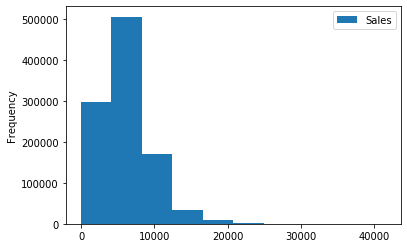

In [19]:
ax = full_store_details.plot.hist( x='CompetitionDistance' ,y='Sales')
ax

Contrary to expectation , the closer the competition the higher the number of sales

#### Influence of opening and reopening competitor stores

In [ ]:
full_store_details

Make the X and Y variables for the imputting the missing variables

Factors such as promotions, competition, school and state holidays,seasonality, and locality as necessary for predicting the sales across the various stores.

Data pipelines allow one to transform data from one representation to another through a series of steps. Pipelines allow one to apply and chain intermediate steps of transform to our data. For example, one can fill missing values, pass the output to cross validation and grid search and then fit the model in series of steps chained together where the output of one is the input to another.